In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import os
import requests
import json
from datetime import datetime

In [2]:
# Reading the final dataset NYbike_trips_Q3.csv

filepath = '/Users/vineetasinha/Documents/workspace/NYCitiBike/CleanedBikeTrips_Q2.csv'
df_NYTrips_Q2 = pd.read_csv(filepath)


/var/folders/pz/jfzwtwys2cb42xz8n922cq7h0000gn/T/ipykernel_46054/2098412404.py:4: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_NYTrips_Q2 = pd.read_csv(filepath)


In [3]:
df_NYTrips_Q2.shape

(13153558, 18)

In [4]:
df_NYTrips_Q2.dtypes


ride_id                object
rideable_type          object
started_at            float64
ended_at              float64
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
Date                   object
AvgTemp               float64
_merge                 object
tripduration          float64
log_tripduration      float64
dtype: object

In [5]:
# Count missing values per column
missing_values_count = df_NYTrips_Q2.isnull().sum()

# Display count of missing values
print("Missing values count per column:")
print(missing_values_count)


Missing values count per column:
ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
Date                  0
AvgTemp               0
_merge                0
tripduration          0
log_tripduration      0
dtype: int64


In [6]:
# Picking theme & setting for all the plots

# Set the overall style
sns.set(style="darkgrid")

# Set the color palette
sns.set_palette("muted")



In [7]:
# Assuming df is your dataset
top_20_stations = df_NYTrips_Q2['start_station_name'].value_counts().head(20)

# Convert to a DataFrame for easy plotting
top_20_stations_df = pd.DataFrame({
    'start_station_name': top_20_stations.index,
    'count': top_20_stations.values
})

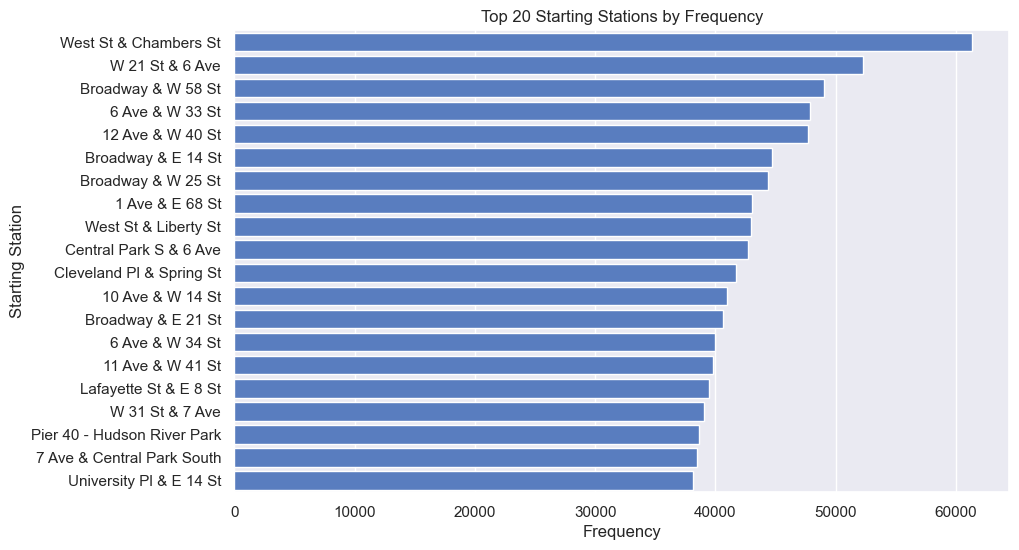

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_20_stations_df, x='count', y='start_station_name')
plt.title('Top 20 Starting Stations by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Starting Station')
plt.show()

After plotting the chart I realized the color palette I chose in the previous step lacked color diversity and did not suit the data. After evaluating I decided to override the color palette temporarily for the specific plot in the next step.

/var/folders/pz/jfzwtwys2cb42xz8n922cq7h0000gn/T/ipykernel_46054/1201215894.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20_stations_df, x='count', y='start_station_name', palette='tab20')


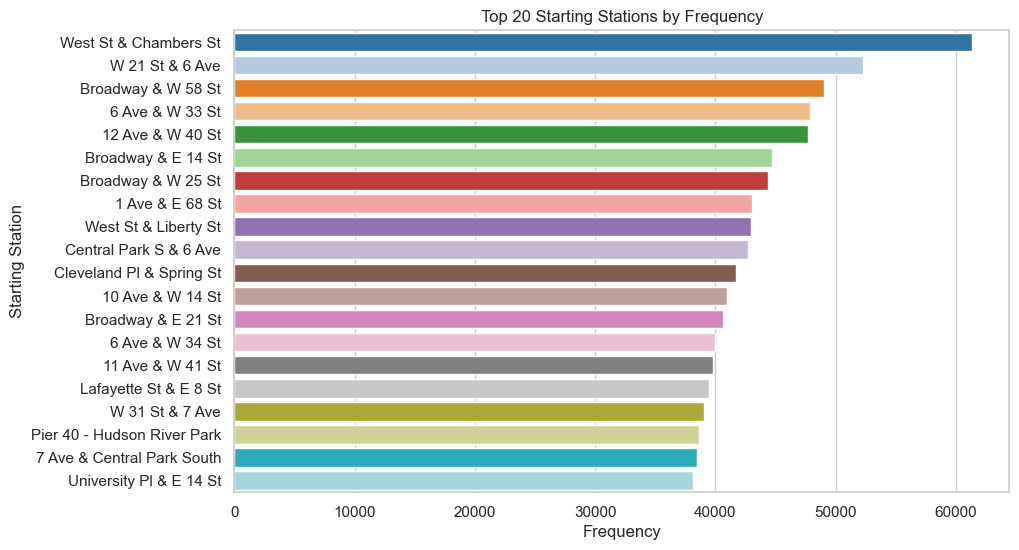

In [9]:
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(10, 6))
    sns.barplot(data=top_20_stations_df, x='count', y='start_station_name', palette='tab20')
    plt.title('Top 20 Starting Stations by Frequency')
    plt.xlabel('Frequency')
    plt.ylabel('Starting Station')
    plt.show()

In [10]:
daily_trips_q2 = pd.DataFrame(df_NYTrips_Q2.groupby(['Date'])['ride_id'].count()).reset_index()

In [11]:
# rename a column in the daily_trips_q2 from ride_id to bike_rides_daily
daily_trips_q2.rename(columns = {'ride_id':'bike_rides_daily'}, inplace = True)

# merging two DataFrames (df_NYTrips_Q2 and daily_trips_q2) on a common column, 'Date', while renaming a column from daily_trips_q1 in the process. The merge is performed using an outer join, and an additional column called 'merge_indicator' is added to indicate the source of each row.
df_2022_Q2 = df_NYTrips_Q2.merge(daily_trips_q2.rename(columns = {'trip_id':'bike_rides_daily'}), on = 'Date', how = 'outer', indicator = 'merge_indicator')


In [12]:
print(df_2022_Q2['_merge'].value_counts(dropna = False))


_merge
both    13153558
Name: count, dtype: int64


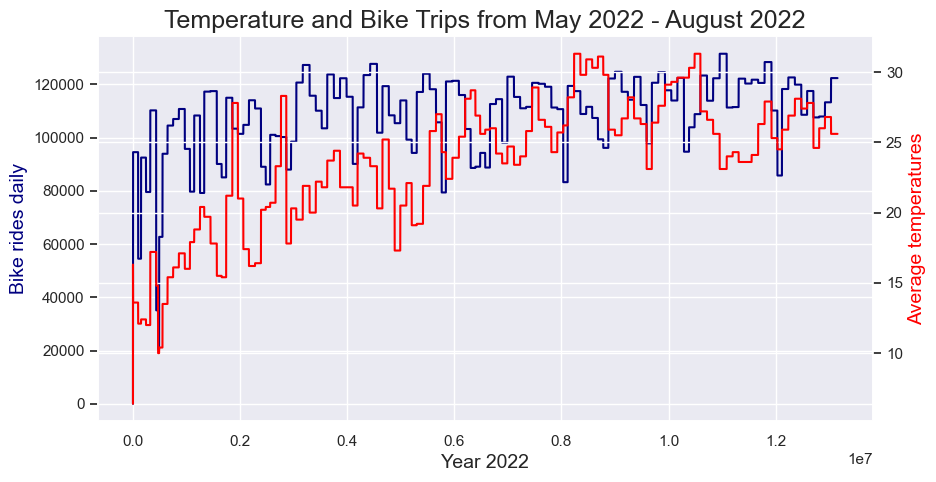

In [13]:

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(10, 5))

# Make a plot of bike rides using Seaborn
sns.lineplot(data=df_2022_Q2, x=df_2022_Q2.index, y='bike_rides_daily', ax=ax, color="navy")
ax.set_xlabel("Year 2022", fontsize=14)  # Set x-axis label
ax.set_ylabel("Bike rides daily", color="navy", fontsize=14)  # Set y-axis label

# Create a second axis for the temperatures
ax2 = ax.twinx()

# Make a plot of temperatures using Seaborn on the second y-axis
sns.lineplot(data=df_2022_Q2, x=df_2022_Q2.index, y='AvgTemp', ax=ax2, color="red")
ax2.set_ylabel("Average temperatures", color="red", fontsize=14)  # Set second y-axis label

# Set title
plt.title('Temperature and Bike Trips from May 2022 - August 2022', fontsize=18)

# Display the plot
plt.show()


Seasonal Impact (Spring to Summer):
------------------------------------

May and June (Late Spring to Early Summer)- During these months, temperatures typically rise, leading to an increase in outdoor activities, including biking. The plot shows an increase in bike rides, it indicates that warmer, pleasant weather encourages more bike trips.

July and August (Peak Summer)- These months are usually the hottest. Bike rides continue to increase or plateau, it suggests that summer weather supports consistent biking activity. However, if there's a drop, it could be due to extreme heat discouraging biking.

In [39]:
df_2022_Q2.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Date,AvgTemp,_merge,tripduration,log_tripduration,bike_rides_daily,merge_indicator
0,99381CF200893163,classic_bike,1.643933e+12,1.653985e+12,Brooklyn Bridge Park - Pier 2,4756.04,Park Cir & East Dr,3344.02,40.698458,-73.997178,40.651566,-73.972212,casual,2022-02-03,6.4,both,167534.312833,12.028949,1,both
1,F7785752D5ED2C24,classic_bike,1.647523e+12,1.657903e+12,Eastern Pkwy & Washington Ave,3928.08,36 Ave & 31 St,6572.08,40.671649,-73.963115,40.756513,-73.929575,casual,2022-03-17,8.2,both,173003.343650,12.061072,1,both
2,384E474CCCB150AC,classic_bike,1.647795e+12,1.651530e+12,Smith St & 3 St,4151.01,Pier 40 Dock Station,SYS035,40.678724,-73.995991,40.728660,-74.011980,casual,2022-03-20,14.3,both,62249.059617,11.038915,1,both


In [14]:
# Check the unique values of rideable_type
print(df_2022_Q2['rideable_type'].value_counts())

# Check the range of tripduration
print(df_2022_Q2['tripduration'].describe())


rideable_type
classic_bike     8557166
electric_bike    4596392
Name: count, dtype: int64
count    1.315356e+07
mean     1.715560e+01
std      1.963871e+02
min      1.000333e+00
25%      6.172133e+00
50%      1.095289e+01
75%      1.949910e+01
max      1.730033e+05
Name: tripduration, dtype: float64


/var/folders/pz/jfzwtwys2cb42xz8n922cq7h0000gn/T/ipykernel_46054/2732622728.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_2022_Q2, x='rideable_type', y='log_tripduration', palette = my_colors)


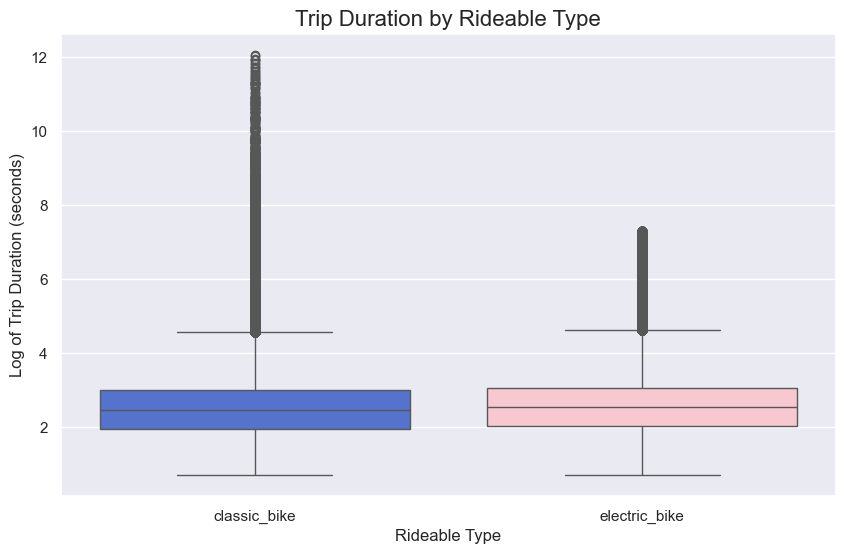

In [15]:
# Optional: If tripduration has extreme values, you can use log transformation for better visibility
df_2022_Q2['log_tripduration'] = df_2022_Q2['tripduration'].apply(lambda x: np.log(x + 1))

# Create the box plot
plt.figure(figsize=(10, 6))
my_colors = {'classic_bike': 'royalblue', 'electric_bike': 'pink'}

sns.boxplot(data=df_2022_Q2, x='rideable_type', y='log_tripduration', palette = my_colors)

# Set labels and title
plt.xlabel('Rideable Type', fontsize=12)
plt.ylabel('Log of Trip Duration (seconds)', fontsize=12)
plt.title('Trip Duration by Rideable Type', fontsize=16)

# Show the plot
plt.show()


Observation
-------------
Log Transformation: Applying a log transformation to tripduration can make it easier to visualize if there are extreme values. Adding 1 before logging avoids issues with zero values.

Categorical Values: Making sure rideable_type is properly categorized. The box plot should now display how trip durations vary across different bike types more clearly.

The box plot helped visualizing the distribution of trip durations for classic and electric bikes, highlighting outliers.It is quite clear that the classic bike has more outliers as compaired to electric bike

A FacetGrid can be very useful for comparing distributions and patterns across different subsets of your data. For your project, you might use FacetGrid to create multiple plots for bike trip durations, separated by bike type or user type. This would allow you to visualize and compare the distributions of trip durations across these categories side-by-side.

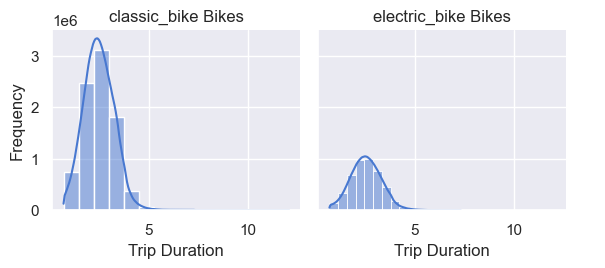

In [42]:
# Initialize a FacetGrid with 'rideable_type' as the columns
g = sns.FacetGrid(df_2022_Q2, col='rideable_type', margin_titles=True)

# Map a histogram of 'tripduration' to each subplot
g.map_dataframe(sns.histplot, x='log_tripduration', bins=15, kde=True)

# Add titles and labels
g.set_axis_labels('Trip Duration', 'Frequency')
g.set_titles(col_template="{col_name} Bikes")
g.add_legend()

plt.show()


Analysis
--------
Distribution Comparison: The FacetGrid allows you to compare the distribution of trip durations between classic and electric bikes in a single view. For instance, if classic bikes have a wider range and more frequent long-duration trips compared to electric bikes, this could indicate differences in usage patterns or user preferences.

Identifying Patterns: By including the KDE (Kernel Density Estimate) in the histogram, you can observe the smooth distribution of trip durations. This helps in understanding if there are more significant peaks or clusters in one bike type over the other.

Outlier Identification: The histograms can help identify if one bike type has more extreme values or outliers in trip duration, providing insight into potential anomalies or unique usage patterns specific to that bike type.


Peaks in Distribution
---------------------

Classic Bikes:
Peak at Specific Durations: A peak in the histogram for classic bikes suggests that most trips using these bikes tend to cluster around a particular duration. This could represent typical short commutes or leisure rides.
Distribution Spread: If the distribution is broader, it might indicate a wider variety of trip lengths, reflecting diverse usage patterns.
Electric Bikes:
Different Peak Position: The peak for electric bikes might occur at shorter durations than classic bikes, reflecting their ability to cover distances more quickly. Alternatively, if the peak is at longer durations, it could indicate that riders use electric bikes for longer, more comfortable trips.
Multiple Peaks: Multiple peaks could indicate different usage patterns, such as short commutes and longer leisure rides, each contributing to distinct trip durations.

Bike Allocation
------------------

Peak Duration Insights: Understanding where the peaks occur can help in determining the right mix of bike types at different stations. For example, if electric bikes are frequently used for longer trips, stations in areas where people start longer rides might need more electric bikes.
Demand Matching: Stations in residential areas might see a peak in classic bike usage during morning and evening commute times, requiring more classic bikes during these periods.


In [16]:
df_2022_Q2.to_csv('/Users/vineetasinha/Documents/workspace/NYCitiBike/BikeTripsVisualizations_Q2.csv', index=False)
